In [1]:
import pandas as pd

# untuk memuat data dari file csv
file_path = 'data_penjualan_laptop_agustus.csv'
data = pd.read_csv(file_path)

# untuk menampilkan 5 baris pertama dari data
data.head()

,Tanggal,Model Laptop,Jumlah Terjual,Harga per Unit (IDR),Total Penjualan (IDR)
0,01-08-2024,Acer Aspire 5,15,8000000,120000000
1,01-08-2024,Dell Inspiron,20,10000000,200000000
2,02-08-2024,HP Pavilion,10,9500000,95000000
3,02-08-2024,Lenovo Yoga,8,12000000,96000000
4,03-08-2024,Asus VivoBook,12,7500000,90000000


In [2]:
# untuk memeriksa tipe data setiap kolom
data.info()

# untuk memeriksa statistik deskriptif dari data numerik
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tanggal                24 non-null     object
 1   Model Laptop           24 non-null     object
 2   Jumlah Terjual         24 non-null     int64 
 3   Harga per Unit (IDR)   24 non-null     int64 
 4   Total Penjualan (IDR)  24 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


,Jumlah Terjual,Harga per Unit (IDR),Total Penjualan (IDR)
count,24.000000,2.400000e+01,2.400000e+01
mean,8.250000,1.259583e+07,9.595417e+07
std,3.903733,3.217274e+06,3.223855e+07
min,3.000000,7.500000e+06,5.400000e+07
25%,5.750000,1.000000e+07,7.830000e+07
50%,7.500000,1.225000e+07,9.250000e+07
75%,10.000000,1.462500e+07,1.080000e+08
max,20.000000,2.000000e+07,2.000000e+08


In [29]:
# mengkonversi kolom 'Tanggal' menjadi tipe data datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d-%m-%Y')

dtype('<M8[ns]')

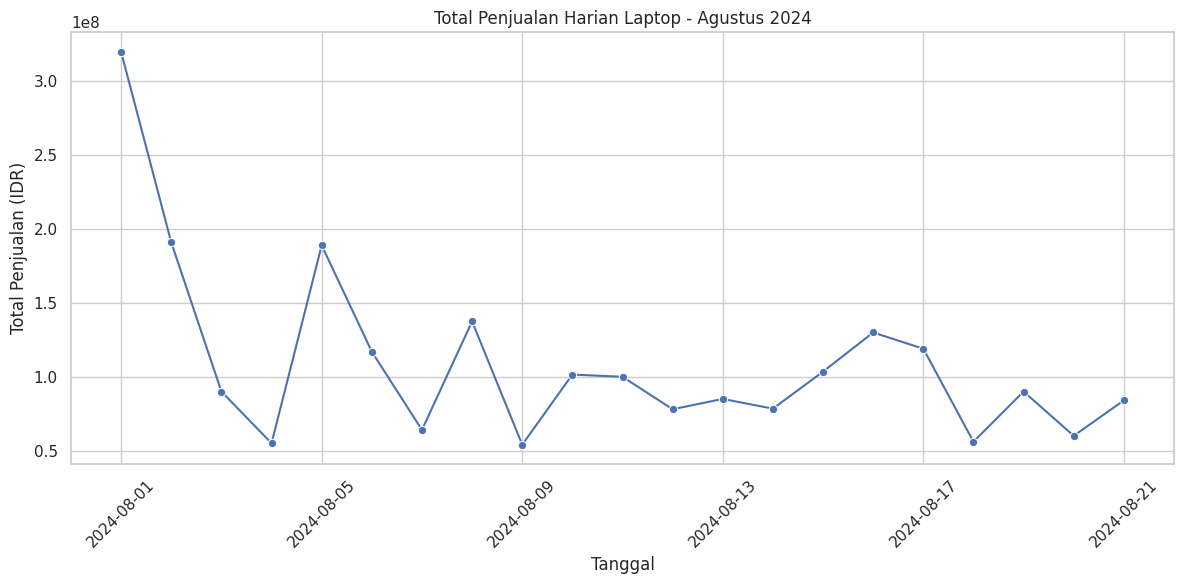

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# mengatur gaya visualisasinya
sns.set(style='whitegrid')

# membuat plot penjualan harian
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Tanggal', y='Total Penjualan (IDR)', marker='o')
plt.title('Total Penjualan Harian Laptop - Agustus 2024')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (IDR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# mengelompokkan setiap data berdasarkan model laptop dan menghitung total penjualannya
model_sales = data.groupby('Model Laptop')['Total Penjualan (IDR)'].sum().reset_index()

# membuat urutan hasil
model_sales = model_sales.sort_values(by='Total Penjualan (IDR)', ascending=False)

# lalu kemudian menampilkan hasilnya
model_sales

,Model Laptop,Total Penjualan (IDR)
10,Dell Inspiron,200000000
4,Apple MacBook Air,195000000
19,Lenovo ThinkPad,137500000
8,Asus ZenBook,130000000
0,Acer Aspire 5,120000000
17,HP Spectre,119000000
12,Dell XPS,117000000
18,Lenovo Legion,103500000
21,MSI Creator,101500000
5,Apple MacBook Pro,100000000


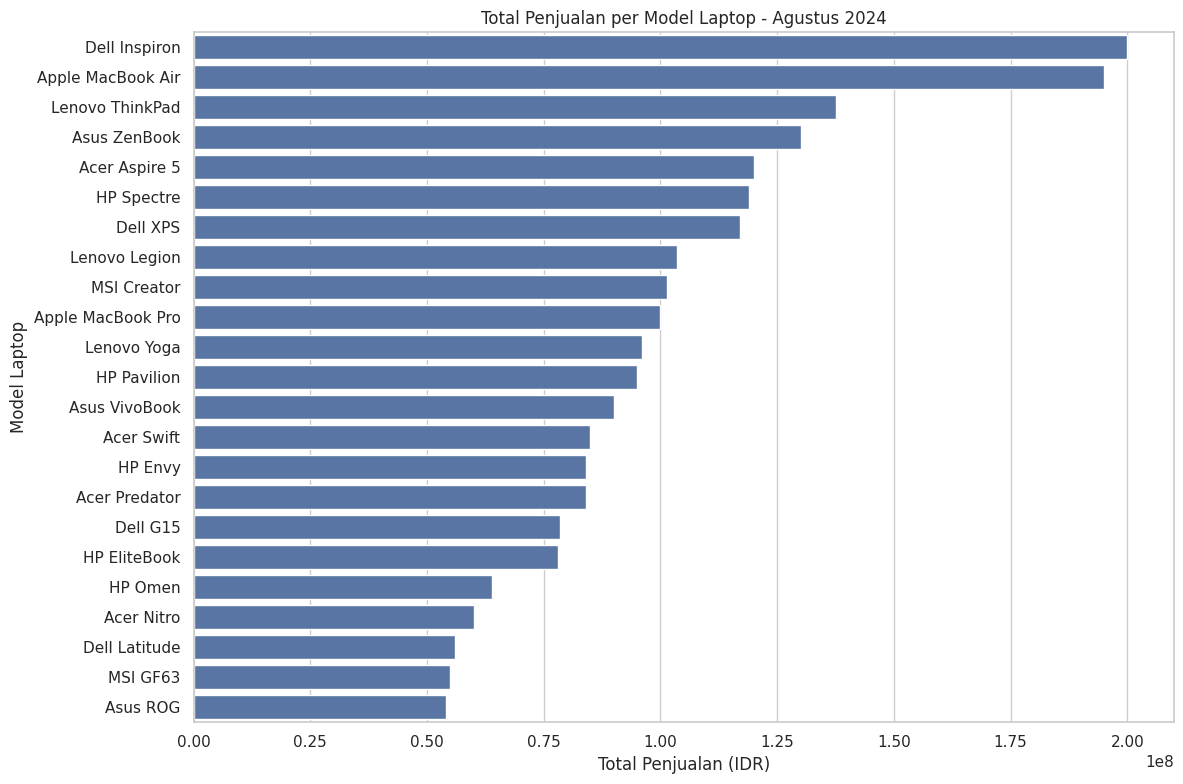

In [18]:
# membuat plot penjualan per model
plt.figure(figsize=(12, 8))
sns.barplot(data=model_sales, x='Total Penjualan (IDR)', y='Model Laptop', orient='h')
plt.title('Total Penjualan per Model Laptop - Agustus 2024')
plt.xlabel('Total Penjualan (IDR)')
plt.ylabel('Model Laptop')
plt.tight_layout()
plt.show()

In [25]:
# menentukan rentang harga
bins = [0, 9000000, 11000000, 13000000, 15000000, float('inf')]
labels = ['<9M', '9M-11M', '11M-13M', '13M-15M', '>15M']
data['Rentang Harga'] = pd.cut(data['Harga per Unit (IDR)'], bins=bins, labels=labels)

# mengelompokkan setiap data berdasarkan rentang harga dan menghitung total penjualannya
price_range_sales = data.groupby('Rentang Harga')['Total Penjualan (IDR)'].sum().reset_index()

# lalu kemudian menampilkan hasilnya
price_range_sales

,Rentang Harga,Total Penjualan (IDR)
0,<9M,295000000
1,9M-11M,642400000
2,11M-13M,592000000
3,13M-15M,436500000
4,>15M,337000000


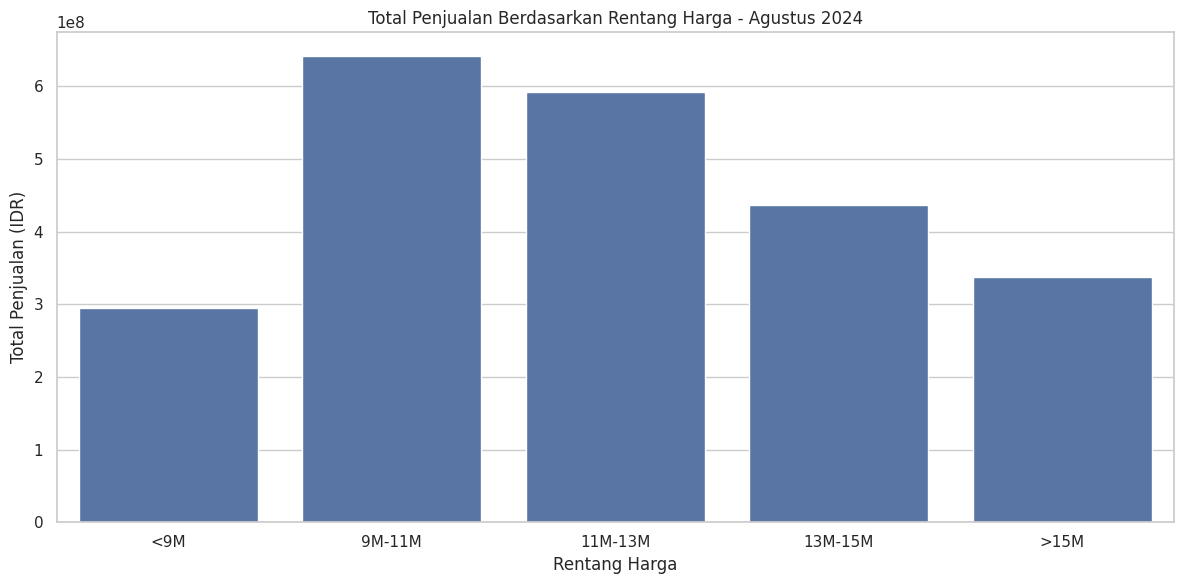

In [21]:
# membuat plot penjualan berdasarkan rentang harga
plt.figure(figsize=(12, 6))
sns.barplot(data=price_range_sales, x='Rentang Harga', y='Total Penjualan (IDR)')
plt.title('Total Penjualan Berdasarkan Rentang Harga - Agustus 2024')
plt.xlabel('Rentang Harga')
plt.ylabel('Total Penjualan (IDR)')
plt.tight_layout()
plt.show()